# Assignment 1:

#### Test if the distribution of ages is the same for 
    
    1) Male and female riders
    
    2) Day and night riders
    
    Use 3 tests: KS, Pearson's, Spearman's

## 1. Test the distribution of age between male and female riders

In [11]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


* Read in data from January 2015.

In [132]:
df=pd.read_csv('data/201501-citibike-tripdata.csv')

* Split the data by gender and extract the age.

In [133]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

* lets splot age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. if i was to do this "for real" the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

* the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

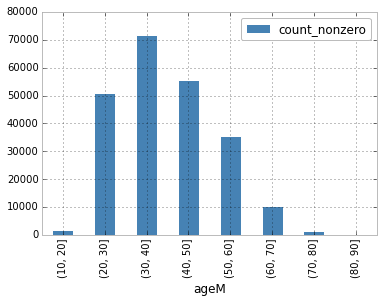

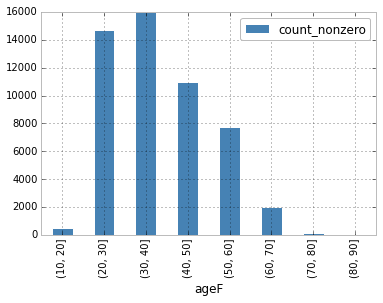

In [107]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.001656
(20, 30]       0.060938
(30, 40]       0.052105
(40, 50]       0.018598
(50, 60]       0.010887
(60, 70]       0.003129
(70, 80]       0.000113
(80, 90]       0.000000


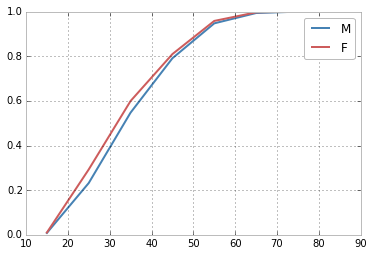

In [108]:
#print df.ageS, df.ageS.cumsum()
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

dif=np.abs(csM / csM.max()-csF / csF.max())

print dif

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")

pl.legend()

they look pretty darn similar! that sets my expectation for the tests to come. if i wanted to code the KS test by hand i woud have everything i need: the normalized cumulative distributions can be subtracted from each other and the max distance can be seeked. 

Notice that there amay be Nan values you are gonna have to deal with! you can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

### 1.1 Kolmogorov-Smirnov Test

### Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1+n2)}{n1n2}}$

where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

* *Extra Credit: Manually calculate K-S test*

In [109]:
d_stat = max(dif['count_nonzero'])
print d_stat

0.0609376938212


In [110]:
n1 = sum(df.ageM>0)
n2 = sum(df.ageF>0)
alpha=0.05
c_alpha = 1.36
d_crit = c_alpha*sqrt((n1+n2)/float(n1*n2))

In [111]:
def kstest(d_stat, d_crit, alpha):
    print('Is the D_stat {0:.2f} smaller than the critical value D_crit {1:2f} at level {2:2f}? '.\
          format(d_stat,d_crit,alpha))
    print('{0}, the Null hypothesis is {1}.'.format('Yes' if d_stat<d_crit else 'No','rejected'if d_stat<d_crit else\
                                                  'not rejected'))
print('My manual calculation of D stat is {0:.4f}.'.format(d_stat))
kstest(d_stat, d_crit, alpha)

My manual calculation of D stat is 0.0609.
Is the D_stat 0.06 smaller than the critical value D_crit 0.006605 at level 0.050000? 
No, the Null hypothesis is not rejected.


* KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

In [64]:
ks = scipy.stats.ks_2samp(df.ageM.dropna(), df.ageF.dropna())
print ks

(0.067442557802207204, 4.0408611999082294e-168)


### My comment
The D statisitc is larger than the critic value.
Also the scipy ks test also has a p value smaller than level $\alpha=0.05$.
So we can reject the null hypothesis that the distributions of the two samples are the same.

### 1.2 Pearson's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [138]:
#please perform the Pearson's test and tell me what you find
df_cleanF=df.ageF.dropna()
df_cleanM=df.ageM.dropna()
print len(df_cleanF)
print len(df_cleanM)

52093
227764


In [155]:
df_cleanM = np.random.choice(df_cleanM,len(df_cleanF),replace=False)
print len(df_cleanM)

52093


In [ ]:
pearson = scipy.stats.pearsonr(df_cleanM, df_cleanF)
print pearson

### 1.3 Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [146]:
#please perform the Spearman's test and tell me what you find
spearman = scipy.stats.spearmanr(df_cleanM, df_cleanF)
print spearman

(0.0017581513581602264, 0.68822191487583484)


### My comment


The P value is much larger than 0.05, for both Pearson and Spearman test. So we can reject that there is relationship between the distribution of men riders and women riders' age.

## 2. Test the distribution of riders during the day vs during the night

hint: remember how I converted the starttime last time in my own citibikes notebook into units that are easy to read. 
df['mystarttime'] = ...
then you can use something like
df['mystarttime'].dt.hour

In [147]:
df=pd.read_csv('data/201501-citibike-tripdata.csv')

In [148]:
df['date'] = pd.to_datetime(df['starttime'])

* In January 2015, the everage sunrise time was 7am and sun sets at 5pm

In [149]:
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour<17)\
                                   & (df['date'].dt.hour>=7)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour>=17)\
                                   |(df['date'].dt.hour<7)]

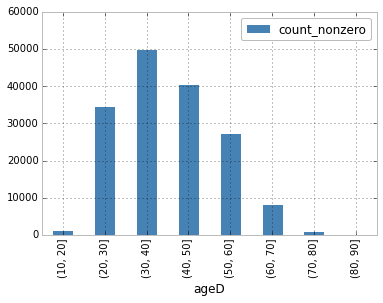

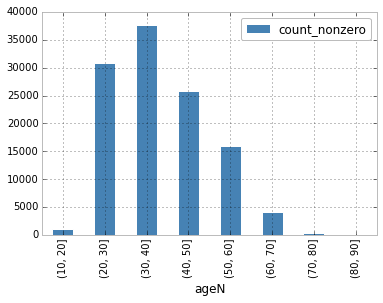

In [150]:
bins = np.arange(10, 99, 10)
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

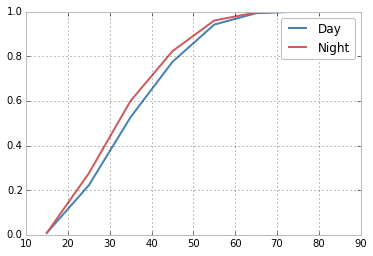

In [151]:
#print df.ageS, df.ageS.cumsum()

csM = df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

csF = df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

diff = np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "Day")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "Night")

pl.legend()

In [153]:
import scipy.stats
ks = scipy.stats.ks_2samp(df.ageN.dropna(), df.ageD.dropna())
print ks

(0.075842139095194938, 0.0)


In [157]:
#please perform the Pearson's test and tell me what you find
df_cleanN = df.ageN.dropna()
df_cleanD = df.ageD.dropna()
print len(df_cleanN)
print len(df_cleanD)

116044
163880


In [158]:
df_cleanD = np.random.choice(df_cleanD,len(df_cleanN),replace=False)

In [159]:
pearsonr= scipy.stats.pearsonr(df_cleanN, df_cleanD)
print pearsonr

(-5.9290029298198148e-05, 0.98388616682500929)


In [160]:
spearman = scipy.stats.spearmanr(df_cleanN, df_cleanD)
print spearman

(0.00075916862368747, 0.79593632035733053)
